In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
segment_ratio = 1.5
first_segment = 50
segments = np.array([first_segment, first_segment/segment_ratio**1, first_segment/segment_ratio**2])

segments

array([50.        , 33.33333333, 22.22222222])

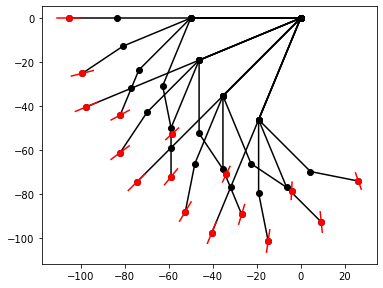

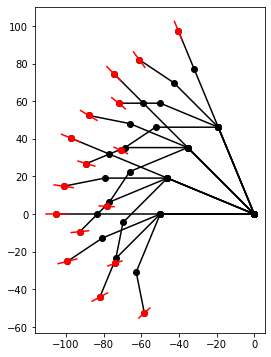

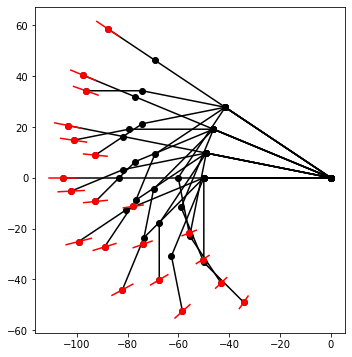

In [4]:
def plot_finger(axs, base_angle, middle_angle):
    base_angle += np.pi
    top_angle = middle_angle / 2

    first_joint_x = segments[0]*np.cos(base_angle)
    first_joint_y = segments[0]*np.sin(base_angle)

    second_joint_x = first_joint_x + segments[1]*np.cos(middle_angle + base_angle)
    second_joint_y = first_joint_y + segments[1]*np.sin(middle_angle + base_angle)

    tip_x = second_joint_x + segments[2]*np.cos(top_angle + middle_angle + base_angle)
    tip_y = second_joint_y + segments[2]*np.sin(top_angle + middle_angle + base_angle)

    # base_to_tip_angle = np.arctan2(tip_x, tip_y)
    # print(base_to_tip_angle)

    axs.plot(
        [0, first_joint_x, second_joint_x, tip_x],
        [0, first_joint_y, second_joint_y, tip_y],
        'o-', color='k', zorder=1,
    )
    axs.plot(
        [tip_x*0.95, tip_x*1.05],
        [tip_y*0.95, tip_y*1.05],
        color='r', zorder=2
    )
    axs.scatter(
        [tip_x], [tip_y], color='r', zorder=2,
    )

fig, axs = plt.subplots(figsize=(6, 6))
for a0 in [0, np.pi/8, np.pi/4, 3*np.pi/8]:
    for a1 in [0, np.pi/8, np.pi/4, 3*np.pi/8]:
        plot_finger(axs, a0, a1)
axs.set_aspect('equal', adjustable='box')
plt.show()

fig, axs = plt.subplots(figsize=(6, 6))
for a0 in [0, np.pi/8, np.pi/4, 3*np.pi/8]:
    for a1 in [0, np.pi/8, np.pi/4, 3*np.pi/8]:
        plot_finger(axs, -a0, a1)
axs.set_aspect('equal', adjustable='box')
plt.show()

fig, axs = plt.subplots(figsize=(6, 6))
for a0 in [0, np.pi/16, np.pi/8, 3*np.pi/16]:
    for a1 in [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]:
        plot_finger(axs, -a0, a1)
axs.set_aspect('equal', adjustable='box')
plt.show()

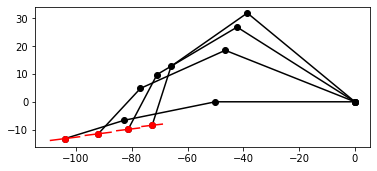

In [5]:
fig, axs = plt.subplots(figsize=(6, 6))
plot_finger(axs, 0, 0.2)
plot_finger(axs, -0.378, 0.8)
plot_finger(axs, -0.565, 1.1)
plot_finger(axs, -0.69, 1.3)
axs.set_aspect('equal', adjustable='box')
plt.show()

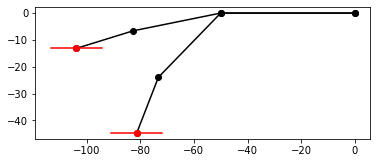

In [6]:
def plot_finger(axs, base_angle, middle_angle):
    base_angle += np.pi
    top_angle = middle_angle / 2

    first_joint_x = segments[0]*np.cos(base_angle)
    first_joint_y = segments[0]*np.sin(base_angle)

    second_joint_x = first_joint_x + segments[1]*np.cos(middle_angle + base_angle)
    second_joint_y = first_joint_y + segments[1]*np.sin(middle_angle + base_angle)

    tip_x = second_joint_x + segments[2]*np.cos(top_angle + middle_angle + base_angle)
    tip_y = second_joint_y + segments[2]*np.sin(top_angle + middle_angle + base_angle)

    u = 19.05

    axs.plot(
        [0, first_joint_x, second_joint_x, tip_x],
        [0, first_joint_y, second_joint_y, tip_y],
        'o-', color='k', zorder=1,
    )
    axs.plot(
        [tip_x + 0.5*u*np.cos(base_angle), tip_x - 0.5*u*np.cos(base_angle)],
        [tip_y + 0.5*u*np.sin(base_angle), tip_y - 0.5*u*np.sin(base_angle)],
        color='r', zorder=2
    )
    axs.scatter(
        [tip_x], [tip_y], color='r', zorder=2,
    )

fig, axs = plt.subplots(figsize=(6, 6))
plot_finger(axs, 0, 0.2)
plot_finger(axs, 0, 0.8)
axs.set_aspect('equal', adjustable='box')
plt.show()

In [7]:
from scipy.optimize import minimize

40.01526216033232
angles = [-33.84, -0.00, 22.75, 39.95];
arc_offsets = [
    [-18.357460754089114, 5.121070397919233],
    [0.0, 0.0],
    [18.660524421012955, 3.959336679413564],
    [34.88444600991245, 13.9768031548913]
];


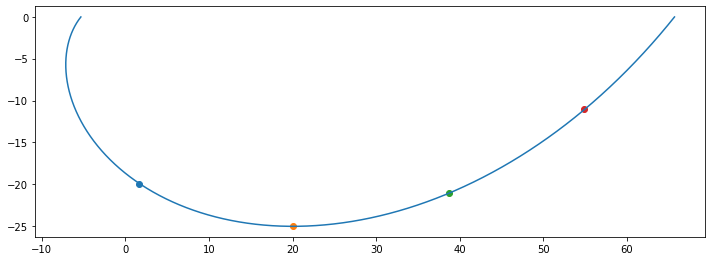

In [8]:
a = 0.431
# b = 0.3063489
b = 0.8
t = np.linspace(np.pi, 2*np.pi, 10000)
r = a*np.exp(b*t)
x = r*np.cos(t)
y = r*np.sin(t)

def dist(x0, y0, x1, y1):
    return np.sqrt((x1 - x0)**2 + (y1 - y0)**2)

u = 19.05

ix_mid = np.argmin(y)

ix_bot = ix_mid
best = 999
while True:
    d = abs(u - dist(x[ix_mid], y[ix_mid], x[ix_bot], y[ix_bot]))
    if d > best:
        break
    best = d
    ix_bot -= 1

ix_top = ix_mid
best = 999
while True:
    d = abs(u - dist(x[ix_mid], y[ix_mid], x[ix_top], y[ix_top]))
    if d > best:
        break
    best = d
    ix_top += 1

ix_num = ix_top
best = 999
while True:
    d = abs(u - dist(x[ix_num], y[ix_num], x[ix_top], y[ix_top]))
    if d > best:
        break
    best = d
    ix_num += 1

def roc(x0, y0, x1, y1, x2, y2):
    ab = dist(x0, y0, x1, y1)
    ac = dist(x0, y0, x2, y2)
    bc = dist(x2, y2, x1, y1)
    s = 0.5*(ab + ac + bc)
    area = np.sqrt(s*(s - ab)*(s - ac)*(s - bc))
    return 0.25*ab*ac*bc/area

print(roc(x[ix_bot], y[ix_bot], x[ix_mid], y[ix_mid], x[ix_top], y[ix_top]))

def angle_at(ix):
    x0 = x[ix - 1]
    y0 = y[ix - 1]
    x1 = x[ix + 1]
    y1 = y[ix + 1]
    return 90 - np.arctan2(x1 - x0, y1 - y0)*180/np.pi

print(f"angles = [{angle_at(ix_bot):.2f}, {angle_at(ix_mid):.2f}, {angle_at(ix_top):.2f}, {angle_at(ix_num):.2f}];")
print('arc_offsets = [')
print(f"    [{x[ix_bot] - x[ix_mid]}, {y[ix_bot] - y[ix_mid]}],")
print(f"    [{x[ix_mid] - x[ix_mid]}, {y[ix_mid] - y[ix_mid]}],")
print(f"    [{x[ix_top] - x[ix_mid]}, {y[ix_top] - y[ix_mid]}],")
print(f"    [{x[ix_num] - x[ix_mid]}, {y[ix_num] - y[ix_mid]}]")
print('];')

fig, axs = plt.subplots(figsize=(12, 12))
axs.plot(x, y)
axs.scatter(x[ix_bot], y[ix_bot])
axs.scatter(x[ix_mid], y[ix_mid])
axs.scatter(x[ix_top], y[ix_top])
axs.scatter(x[ix_num], y[ix_num])
axs.set_aspect('equal', adjustable='box')
plt.show()

roc = 50.39653253697097
roc = 50.25402247119609
roc = 50.487086403779976
roc = 49.954442991614826


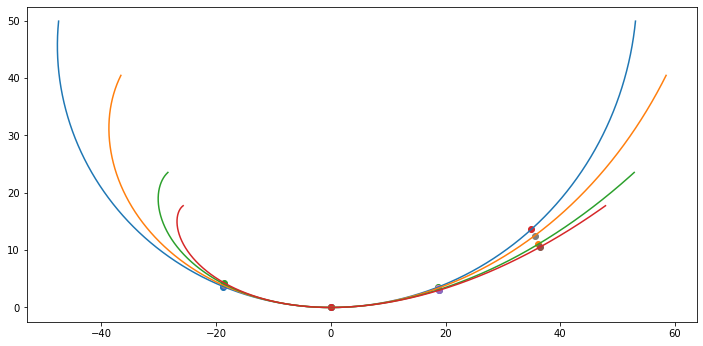

angles = [[-22.227244614156817, 0.004978608183321853, 21.391117222051435, 42.00317842816105], [-24.125806310027343, -0.0033940687949467474, 19.88859513011714, 36.8102872993294], [-27.17725401453106, 0.005464257263128047, 17.70123383425731, 30.878551565982526], [-29.50282361896626, 0.0021268760771846473, 16.887815444951244, 28.78700536394316]];
arc_offsets = [[[-18.712592218640573, 3.6506017861962263], [0.0, 0.0], [18.7247868862277, 3.5599969778645857], [34.93421214898676, 13.594243769671337]], [[-18.665566662191186, 3.845242233645777], [0.0, 0.0], [18.77318007787687, 3.3882437428535113], [35.52786596861195, 12.507231672443101]], [[-18.610059416221134, 4.093290747478612], [0.0, 0.0], [18.807968828713783, 3.0981830088880606], [36.16373306382499, 11.032420310618416]], [[-18.571454903204426, 4.282553617353777], [0.0, 0.0], [18.849180168936755, 2.9937599937621666], [36.3995538140465, 10.488869005141936]]];
roc = 40.07716703912436
roc = 50.06040530607836
roc = 60.07867681092971
roc = 70.0425

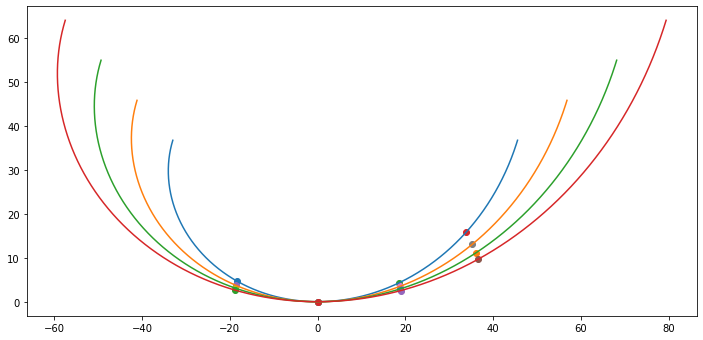

angles = [[-29.678651903535098, 0.0063165933199229585, 25.550871048767178, 47.981114073053945], [-23.306014639832682, 0.0063165933334232705, 20.708386800353594, 39.32224818647953], [-19.183602398575545, 0.006316593314693364, 17.396055567191652, 33.291645126144715], [-16.321316169958152, 0.006316593297356121, 15.01981794343645, 28.917207682430636]];
arc_offsets = [[[-18.456899405464554, 4.753328840112772], [0.0, 0.0], [18.56667870089364, 4.310427227865503], [33.79033914471246, 15.778397741101497]], [[-18.687143368956278, 3.7703964613574], [0.0, 0.0], [18.746072705705032, 3.4908586008715687], [35.22685204372153, 13.071329806566048]], [[-18.80861916081662, 3.121937450388998], [0.0, 0.0], [18.84052776742923, 2.928828890431852], [36.05133271226782, 11.12195086964865]], [[-18.884166756858743, 2.6669612674684515], [0.0, 0.0], [18.91008856338463, 2.5277144910438665], [36.59963873706545, 9.694389162078984]]];


In [9]:
def plot_and_print(axs, res_a, res_xy, a, b, u):
    t = np.linspace(np.pi, 2*np.pi, 10000)
    r = a*np.exp(b*t)
    x = r*np.cos(t)
    y = r*np.sin(t)

    def dist(x0, y0, x1, y1):
        return np.sqrt((x1 - x0)**2 + (y1 - y0)**2)

    ix_mid = np.argmin(y)

    ix_bot = ix_mid
    best = 999
    while True:
        d = abs(u - dist(x[ix_mid], y[ix_mid], x[ix_bot], y[ix_bot]))
        if d > best:
            break
        best = d
        ix_bot -= 1

    ix_top = ix_mid
    best = 999
    while True:
        d = abs(u - dist(x[ix_mid], y[ix_mid], x[ix_top], y[ix_top]))
        if d > best:
            break
        best = d
        ix_top += 1

    ix_num = ix_top
    best = 999
    while True:
        d = abs(u - dist(x[ix_num], y[ix_num], x[ix_top], y[ix_top]))
        if d > best:
            break
        best = d
        ix_num += 1

    def roc(x0, y0, x1, y1, x2, y2):
        ab = dist(x0, y0, x1, y1)
        ac = dist(x0, y0, x2, y2)
        bc = dist(x2, y2, x1, y1)
        s = 0.5*(ab + ac + bc)
        area = np.sqrt(s*(s - ab)*(s - ac)*(s - bc))
        return 0.25*ab*ac*bc/area

    print('roc =', roc(x[ix_bot], y[ix_bot], x[ix_mid], y[ix_mid], x[ix_top], y[ix_top]))

    def angle_at(ix):
        x0 = x[ix - 1]
        y0 = y[ix - 1]
        x1 = x[ix + 1]
        y1 = y[ix + 1]
        return 90 - np.arctan2(x1 - x0, y1 - y0)*180/np.pi

    res_a.append([angle_at(ix_bot), angle_at(ix_mid), angle_at(ix_top), angle_at(ix_num)])
    res_xy.append([
        [x[ix_bot] - x[ix_mid], y[ix_bot] - y[ix_mid]],
        [x[ix_mid] - x[ix_mid], y[ix_mid] - y[ix_mid]],
        [x[ix_top] - x[ix_mid], y[ix_top] - y[ix_mid]],
        [x[ix_num] - x[ix_mid], y[ix_num] - y[ix_mid]],
    ])

    axs.plot(x - x[ix_mid], y - y[ix_mid])
    axs.scatter(x[ix_bot] - x[ix_mid], y[ix_bot] - y[ix_mid])
    axs.scatter(x[ix_mid] - x[ix_mid], y[ix_mid] - y[ix_mid])
    axs.scatter(x[ix_top] - x[ix_mid], y[ix_top] - y[ix_mid])
    axs.scatter(x[ix_num] - x[ix_mid], y[ix_num] - y[ix_mid])



fig, axs = plt.subplots(figsize=(12, 12))

res_a = []
res_xy = []
plot_and_print(axs, res_a, res_xy, 31, 0.1, 19.05)
plot_and_print(axs, res_a, res_xy, 3.4, 0.5, 19.05)
plot_and_print(axs, res_a, res_xy, 0.0785, 1.1, 19.05)
plot_and_print(axs, res_a, res_xy, 0.011, 1.4, 19.05)

axs.set_aspect('equal', adjustable='box')
plt.show()

print(f"angles = {res_a};")
print(f"arc_offsets = {res_xy};")



fig, axs = plt.subplots(figsize=(12, 12))

res_a = []
res_xy = []
plot_and_print(axs, res_a, res_xy, 8.29, 0.3063489, 19.05)
plot_and_print(axs, res_a, res_xy, 10.34, 0.3063489, 19.05)
plot_and_print(axs, res_a, res_xy, 12.4, 0.3063489, 19.05)
plot_and_print(axs, res_a, res_xy, 14.45, 0.3063489, 19.05)

axs.set_aspect('equal', adjustable='box')
plt.show()

print(f"angles = {res_a};")
print(f"arc_offsets = {res_xy};")

roc = 50.91635249460604
roc = 50.79306372938916
roc = 50.662850476146836
roc = 50.523614765884034


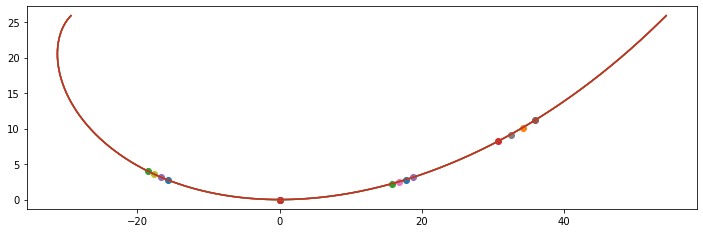

angles = [[-21.336631778035297, -0.004498564717948739, 15.477049590102254, 27.64626651180098], [-23.01079919477172, -0.004498564717948739, 16.32313419856385, 29.014403325477083], [-24.72097021187922, -0.004498564717948739, 17.151217006838678, 30.328534738618217], [-26.5031484297009, -0.004498564717948739, 17.97929981513296, 31.624664351582616]];
arc_offsets = [[[-15.763274157990383, 2.7819631089765444], [0.0, 0.0], [15.858483808623895, 2.2527242718194884], [30.741311722627962, 8.19851496058801]], [[-16.7149989658568, 3.1697666636808606], [0.0, 0.0], [16.8292898270059, 2.529286362618908], [32.52613475602407, 9.160871809498293]], [[-17.64713029587489, 3.5820838743424126], [0.0, 0.0], [17.78930857394542, 2.8180030710969177], [34.2584817549131, 10.147942643881828]], [[-18.57621686303636, 4.027375952863068], [0.0, 0.0], [18.75896792433423, 3.1249686723835772], [35.98332737397284, 11.183475890606536]]];
roc = 51.113686912453275
roc = 51.222743487149195
roc = 50.78077929445526
roc = 50.552319

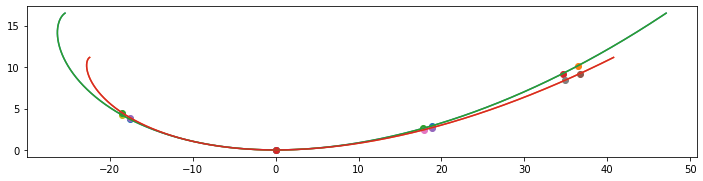

angles = [[-27.084007053762065, 0.008702217159807901, 15.634264773381062, 26.687370083962406], [-30.284630020754335, -0.005602117964301101, 14.305829025147673, 23.79277772002162], [-29.42424107717909, 0.008702217159807901, 16.354336780631783, 27.749476294574556], [-33.596961253875605, -0.005602117964301101, 14.917890231269865, 24.674865928843516]];
arc_offsets = [[[-17.614332150181937, 3.725983306300776], [0.0, 0.0], [17.829841595883924, 2.6180419850876024], [34.6234355614496, 9.20855903813279]], [[-17.57562550802676, 3.9012908145216203], [0.0, 0.0], [17.867351637146964, 2.4297478594386828], [34.88193042026617, 8.391751590625184]], [[-18.53548932464599, 4.220776879654698], [0.0, 0.0], [18.814781563717393, 2.9003839423545905], [36.426429268950045, 10.136002751069817]], [[-18.47413693461592, 4.460758362598612], [0.0, 0.0], [18.828086386321385, 2.68023233013073], [36.70752142072162, 9.213586955405926]]];


In [10]:
fig, axs = plt.subplots(figsize=(12, 12))

res_a = []
res_xy = []
plot_and_print(axs, res_a, res_xy, 0.15, 1, 16)
plot_and_print(axs, res_a, res_xy, 0.15, 1, 17)
plot_and_print(axs, res_a, res_xy, 0.15, 1, 18)
plot_and_print(axs, res_a, res_xy, 0.15, 1, 19)

axs.set_aspect('equal', adjustable='box')
plt.show()

print(f"angles = {res_a};")
print(f"arc_offsets = {res_xy};")



fig, axs = plt.subplots(figsize=(12, 12))

res_a = []
res_xy = []
plot_and_print(axs, res_a, res_xy, 0.0058, 1.5, 18)
plot_and_print(axs, res_a, res_xy, 0.00022, 2, 18)
plot_and_print(axs, res_a, res_xy, 0.0058, 1.5, 19)
plot_and_print(axs, res_a, res_xy, 0.00022, 2, 19)

axs.set_aspect('equal', adjustable='box')
plt.show()

print(f"angles = {res_a};")
print(f"arc_offsets = {res_xy};")

roc = 50.662850476146836
roc = 60.324465195872996
roc = 50.07293992915287
roc = 60.661944261093346


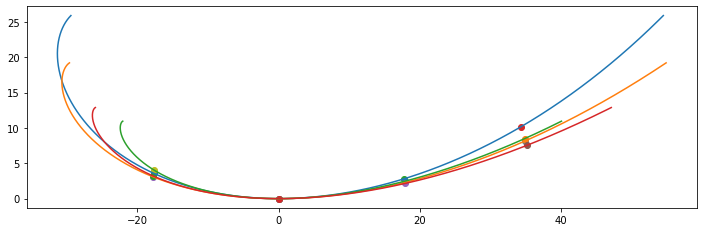

angles = [[-24.72097021187922, -0.004498564717948739, 17.151217006838678, 30.328534738618217], [-21.827481401185196, 0.008702217160163173, 13.780079354876023, 23.87908925586929], [-31.346736231377307, -0.005602117965494813, 14.503848827133254, 24.080806522899138], [-23.71397295504505, -0.005602117964556896, 12.757674209672587, 21.54255269751971]];
arc_offsets = [[[-17.64713029587489, 3.5820838743424126], [0.0, 0.0], [17.78930857394542, 2.8180030710969177], [34.2584817549131, 10.147942643881828]], [[-17.74889944818514, 3.088835784944166], [0.0, 0.0], [17.8787095040569, 2.2927396668731], [34.93199234473605, 8.181954994429042]], [[-17.55361052155834, 4.007816116998053], [0.0, 0.0], [17.845748796687513, 2.463461994233107], [34.8282872761103, 8.49689820215142]], [[-17.71927303725192, 3.200549218190094], [0.0, 0.0], [17.913887240005185, 2.1515520990522834], [35.120868529754716, 7.535430168681858]]];


In [11]:
fig, axs = plt.subplots(figsize=(12, 12))

res_a = []
res_xy = []
plot_and_print(axs, res_a, res_xy, 0.15, 1, 18)
plot_and_print(axs, res_a, res_xy, 0.00675, 1.5, 18)
plot_and_print(axs, res_a, res_xy, 0.000216, 2, 18)
plot_and_print(axs, res_a, res_xy, 0.000254, 2, 18)

# plot_and_print(axs, res_a, res_xy, 0.00022, 2, 18)
# plot_and_print(axs, res_a, res_xy, 0.0058, 1.5, 19)
# plot_and_print(axs, res_a, res_xy, 0.00022, 2, 19)

axs.set_aspect('equal', adjustable='box')
plt.show()

print(f"angles = {res_a};")
print(f"arc_offsets = {res_xy};")

roc = 50.61889400932791
roc = 50.662850476146836
roc = 55.01793447074768
roc = 55.0777777455906


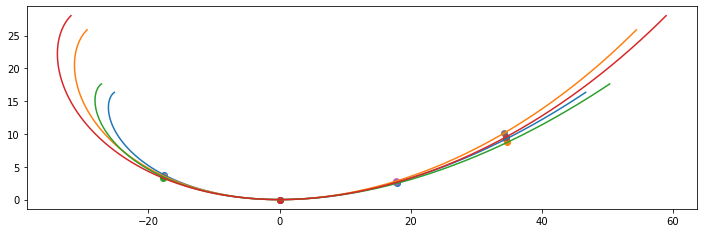

angles = [[-27.444043057348495, 0.008702217161072667, 15.742275574502315, 26.849386285585766], [-24.72097021187922, -0.004498564717948739, 17.151217006838678, 30.328534738618217], [-24.58175682873727, 0.008702217161754788, 14.806181965141661, 25.427244071359254], [-22.362734388299472, -0.004498564708811159, 15.999101795319675, 28.492351120254384]];
arc_offsets = [[[-17.60795772411089, 3.7688305765103145], [0.0, 0.0], [17.821654656596827, 2.636344007915243], [34.59550737838272, 9.265652357530705]], [[-17.64713029587489, 3.5820838743424126], [0.0, 0.0], [17.78930857394542, 2.8180030710969177], [34.2584817549131, 10.147942643881828]], [[-17.68287443761131, 3.4283593979347113], [0.0, 0.0], [17.868491355819003, 2.4745257746808047], [34.77038732681361, 8.747742487342919]], [[-17.71383205484577, 3.26917704569966], [0.0, 0.0], [17.8276377769097, 2.62295655475193], [34.49633589839445, 9.518066367511434]]];


In [12]:

fig, axs = plt.subplots(figsize=(12, 12))

res_a = []
res_xy = []

plot_and_print(axs, res_a, res_xy, 0.00575, 1.5, 18)
plot_and_print(axs, res_a, res_xy, 0.15, 1, 18)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 18) # i think this could be the one
plot_and_print(axs, res_a, res_xy, 0.1625, 1, 18)

# plot_and_print(axs, res_a, res_xy, 0.00675, 1.5, 18)
# plot_and_print(axs, res_a, res_xy, 0.000216, 2, 18)
# plot_and_print(axs, res_a, res_xy, 0.000254, 2, 18)

# plot_and_print(axs, res_a, res_xy, 0.00022, 2, 18)
# plot_and_print(axs, res_a, res_xy, 0.0058, 1.5, 19)
# plot_and_print(axs, res_a, res_xy, 0.00022, 2, 19)

axs.set_aspect('equal', adjustable='box')
plt.show()

print(f"angles = {res_a};")
print(f"arc_offsets = {res_xy};")

roc = 55.01793447074768
roc = 55.01793447074768
roc = 55.01793447074768
roc = 55.01793447074768
roc = 55.01793447074768
roc = 55.01793447074768


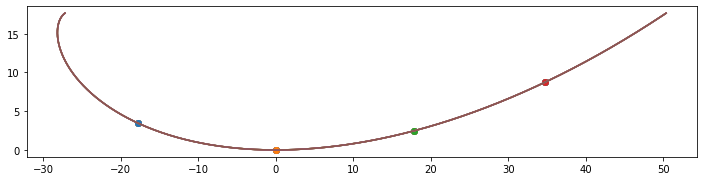

angles = [[-24.58175682873727, 0.008702217161754788, 14.806181965141661, 25.427244071359254], [-24.58175682873727, 0.008702217161754788, 14.806181965141661, 25.427244071359254], [-24.58175682873727, 0.008702217161754788, 14.806181965141661, 25.427244071359254], [-24.58175682873727, 0.008702217161754788, 14.806181965141661, 25.427244071359254], [-24.58175682873727, 0.008702217161754788, 14.806181965141661, 25.427244071359254], [-24.58175682873727, 0.008702217161754788, 14.806181965141661, 25.427244071359254]];
arc_offsets = [[[-17.68287443761131, 3.4283593979347113], [0.0, 0.0], [17.868491355819003, 2.4745257746808047], [34.77038732681361, 8.747742487342919]], [[-17.68287443761131, 3.4283593979347113], [0.0, 0.0], [17.868491355819003, 2.4745257746808047], [34.77038732681361, 8.747742487342919]], [[-17.68287443761131, 3.4283593979347113], [0.0, 0.0], [17.868491355819003, 2.4745257746808047], [34.77038732681361, 8.747742487342919]], [[-17.68287443761131, 3.4283593979347113], [0.0, 0.0], [

In [13]:
fig, axs = plt.subplots(figsize=(12, 12))

res_a = []
res_xy = []

# same for each finger
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 18)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 18)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 18)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 18)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 18)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 18)

axs.set_aspect('equal', adjustable='box')
plt.show()

print(f"angles = {res_a};")
print(f"arc_offsets = {res_xy};")

roc = 55.15200488656885
roc = 55.15200488656885
roc = 55.15200488656885
roc = 55.15200488656885
roc = 55.42523676570712
roc = 55.42523676570712


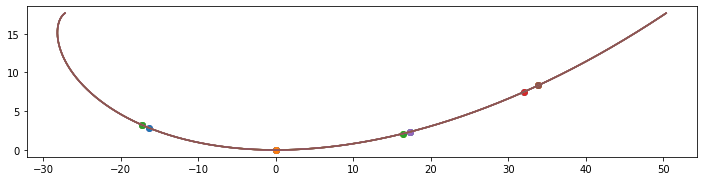

angles = [[-23.609659619023915, 0.008702217161754788, 14.44614596154696, 24.905191866145216], [-23.609659619023915, 0.008702217161754788, 14.44614596154696, 24.905191866145216], [-23.609659619023915, 0.008702217161754788, 14.44614596154696, 24.905191866145216], [-23.609659619023915, 0.008702217161754788, 14.44614596154696, 24.905191866145216], [-21.755474200464832, 0.008702217161754788, 13.762077554696603, 23.843085655484245], [-21.755474200464832, 0.008702217161754788, 13.762077554696603, 23.843085655484245]];
arc_offsets = [[[-17.210314922228584, 3.217036166278822], [0.0, 0.0], [17.357249548231927, 2.34110526323877], [33.85664243765502, 8.318413124313896]], [[-17.210314922228584, 3.217036166278822], [0.0, 0.0], [17.357249548231927, 2.34110526323877], [33.85664243765502, 8.318413124313896]], [[-17.210314922228584, 3.217036166278822], [0.0, 0.0], [17.357249548231927, 2.34110526323877], [33.85664243765502, 8.318413124313896]], [[-17.210314922228584, 3.217036166278822], [0.0, 0.0], [17.3

In [15]:
# I think we want slightly closer key spacing

fig, axs = plt.subplots(figsize=(12, 12))

res_a = []
res_xy = []

# same for each finger
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 17.5)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 17.5)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 17.5)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 17.5)
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 16.5) # but significantly closer for pinkies
plot_and_print(axs, res_a, res_xy, 0.0062, 1.5, 16.5) # but significantly closer for pinkies

axs.set_aspect('equal', adjustable='box')
plt.show()

print(f"angles = {res_a};")
print(f"arc_offsets = {res_xy};")